In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold

#  Saving Features as pandas dataframe

In [2]:
df = pd.read_csv('extracted_feature_values_midi.csv')

In [3]:
cluster_mood_filename = df.cluster_mood_filename
temp = []
cluster = []
mood = []
filename = []

for i in cluster_mood_filename:
    temp.append(i)
temp = [i.split('\\') for i in temp]

for path in temp:
    cluster.append(path[-3])
    mood.append(path[-2])
    filename.append(path[-1].split('.')[0])

df['cluster'] = cluster
df['mood'] = mood
df['filename'] = filename

cols = [col for col in df.columns]
xcols = cols[1:-3]
ycol = cols[-3]
print(ycol)

cluster


#  Applying label encoder and splitting the dataset into train and test datasets

In [4]:
le = preprocessing.LabelEncoder()
X = df[xcols]
X = X.fillna(0)
Y = df[ycol]
Y = pd.DataFrame(Y)
Y = Y.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')
files = df['filename']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
# print(type(df))
# print(type(X_train))
# print(type(Y_train))
# print(type(xcols))
# print(type(ycol))
# print(X.isnull().sum())
# print(Y.isnull().sum())
# print(X.shape)
# X_nonan = X.fillna(0)
# print(X_nonan.isnull().values.any())
# print(X_nonan.shape)
print(X_train.shape)
print(Y_train.shape)
X_train.head()


(156, 1495)
(156, 1)


,Basic_Pitch_Histogram_0,Basic_Pitch_Histogram_1,Basic_Pitch_Histogram_2,Basic_Pitch_Histogram_3,Basic_Pitch_Histogram_4,Basic_Pitch_Histogram_5,Basic_Pitch_Histogram_6,Basic_Pitch_Histogram_7,Basic_Pitch_Histogram_8,Basic_Pitch_Histogram_9,...,Parallel_Motion,Similar_Motion,Contrary_Motion,Oblique_Motion,Parallel_Fifths,Parallel_Octaves,Dynamic_Range,Variation_of_Dynamics,Variation_of_Dynamics_In_Each_Voice,Average_Note_to_Note_Change_in_Dynamics
89,0.0,0,0,0,0,0,0,0,0,0,...,0.08159,0.2235,0.11960,0.5752,0.007166,0.025360,71,15.46,5.316,7.787
149,0.0,0,0,0,0,0,0,0,0,0,...,0.06225,0.2070,0.15160,0.5792,0.000000,0.000000,27,10.15,0.000,0.000
12,0.0,0,0,0,0,0,0,0,0,0,...,0.35140,0.1201,0.05375,0.4747,0.035230,0.171600,120,13.06,5.318,1.497
162,0.0,0,0,0,0,0,0,0,0,0,...,0.10010,0.3271,0.02455,0.5483,0.009547,0.043100,86,17.49,6.767,6.190
86,0.0,0,0,0,0,0,0,0,0,0,...,0.03506,0.2946,0.07372,0.5967,0.002949,0.008847,105,15.22,7.649,5.596


#  Normalizing the dataset for improved svm performance

In [5]:
#Normalizing using standard scalor 
normalized_X = X.values
std_scalor = preprocessing.StandardScaler()
X_scaled = std_scalor.fit_transform(normalized_X)
normalized_X = pd.DataFrame(X_scaled, columns=xcols)
X_train3, X_test3, Y_train3, Y_test3 = train_test_split(normalized_X, Y, test_size=0.3)
normalized_X.head()

,Basic_Pitch_Histogram_0,Basic_Pitch_Histogram_1,Basic_Pitch_Histogram_2,Basic_Pitch_Histogram_3,Basic_Pitch_Histogram_4,Basic_Pitch_Histogram_5,Basic_Pitch_Histogram_6,Basic_Pitch_Histogram_7,Basic_Pitch_Histogram_8,Basic_Pitch_Histogram_9,...,Parallel_Motion,Similar_Motion,Contrary_Motion,Oblique_Motion,Parallel_Fifths,Parallel_Octaves,Dynamic_Range,Variation_of_Dynamics,Variation_of_Dynamics_In_Each_Voice,Average_Note_to_Note_Change_in_Dynamics
0,-0.071611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.029958,-0.288967,0.402916,-0.870700,0.234466,1.133501,0.432650,-0.153625,-0.318140,-0.272365
1,-0.071611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.322842,-0.966963,-1.480627,1.640473,0.192266,-0.432250,-0.930685,1.625977,-1.484887,-1.258050
2,-0.071611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.763202,-0.735132,7.522922,-1.031701,-0.492572,-0.698894,3.295654,1.931535,3.223318,0.950938
3,-0.071611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.420798,-0.860234,0.228022,1.095548,-0.463812,-0.598059,-0.555768,0.575720,-0.355290,-0.264760
4,-0.071611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.187340,-0.771875,-0.317818,0.968059,-0.413584,0.121219,0.330400,-2.150035,-1.363933,-1.262548


# SVM classification on original dataset without feature selection

In [6]:
# %%time
# #clf = LinearSVC(max_iter = 10000000, verbose = 1)
# clf = svm.SVC(C=1, kernel='linear', verbose = True)
# clf.fit(X_train, Y_train.values.ravel())
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)
# #cv = StratifiedKFold(5)
# #cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
# train_accuracy_svm = cross_val_score(clf, X_train, Y_train.values.ravel(), cv=cv, n_jobs=15).mean()
# test_accuracy_svm = clf.score(X_test, Y_test.values.ravel())

# print("Training accuracy " + str(train_accuracy_svm))
# print("Test accuracy " + str(test_accuracy_svm))

# SVM classification on normalized dataset without feature selection

In [7]:
%%time
clf = svm.SVC(C=0.1, kernel='linear', verbose = True)
clf.fit(X_train3, Y_train3.values.ravel())
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)
#cv = StratifiedKFold(5)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
train_accuracy_svm_norm = cross_val_score(clf, X_train3, Y_train3.values.ravel(), cv=cv, n_jobs=15).mean()
test_accuracy_svm_norm = clf.score(X_test3, Y_test3.values.ravel())

print("Training accuracy " + str(train_accuracy_svm_norm))
print("Test accuracy " + str(test_accuracy_svm_norm))

[LibSVM]Training accuracy 0.3192857142857143
Test accuracy 0.3389830508474576
Wall time: 8.09 s


#  Feature Selection on Midi features

Methods to employ -<br> 1) Tree based feature selection(Random Forests) <br>
                    2) Recursive feature elimination with cross validation using SVM estimators <br>
                    3) Anova F-measures <br>
                    4) Chi-squared <br>
                    5) Principal component analysis<br>
We will apply each of them individually, evaluate performance, and choose a combination
Principal component analysis should be performed as the dimensions of the feature vectore(1495) is more than the number of samples(196) <br>

**study showed svm classification based on midi features had a test accuracy of 35%**

https://www.kaggle.com/arrohit/feature-selection-and-hypertuning-svm  **tree based feature selection**

In [8]:
%%time
rf_clf = RandomForestClassifier()
rf_clf = rf_clf.fit(X_train3, Y_train3.values.ravel())
model = SelectFromModel(rf_clf, prefit=True)

rf_X_train = X_train3.loc[:, model.get_support()]
rf_X_test = X_test3.loc[:, model.get_support()]
print(type(rf_X_train))
print(rf_X_train.shape)
rf_X_train.head()

<class 'pandas.core.frame.DataFrame'>
(137, 536)
Wall time: 201 ms


,Basic_Pitch_Histogram_25,Basic_Pitch_Histogram_28,Basic_Pitch_Histogram_31,Basic_Pitch_Histogram_33,Basic_Pitch_Histogram_35,Basic_Pitch_Histogram_36,Basic_Pitch_Histogram_37,Basic_Pitch_Histogram_38,Basic_Pitch_Histogram_40,Basic_Pitch_Histogram_41,...,Voice_Separation,Variability_of_Voice_Separation,Parallel_Motion,Similar_Motion,Contrary_Motion,Oblique_Motion,Parallel_Fifths,Variation_of_Dynamics,Variation_of_Dynamics_In_Each_Voice,Average_Note_to_Note_Change_in_Dynamics
25,-0.007813,0.422440,0.023239,0.871298,-0.182570,-0.690407,0.102471,0.275766,0.354596,-0.553964,...,-0.054021,-0.898156,-0.282199,0.595490,0.075862,-0.204842,-0.334734,-0.205831,0.483793,1.295948
137,-0.093576,-0.356986,-0.416183,-0.603628,-0.495977,-0.575573,-0.453123,-0.154263,-0.388340,-0.553793,...,-1.284459,-1.339453,-0.296066,0.460766,-0.481683,0.101861,-0.186253,-0.812339,-0.635261,-0.358988
183,-0.093576,-0.356986,0.431855,0.759547,-0.339619,0.021397,-0.453123,0.475487,-0.519604,0.093490,...,-0.493463,-0.659056,-0.247752,-1.525982,0.187506,1.491857,0.600050,-0.540562,-0.463003,0.707947
61,-0.093576,-0.356986,-0.440096,-0.616224,-0.512604,-0.530994,0.303126,-0.497674,-0.501939,-0.031941,...,-0.732168,-0.767842,-0.443443,0.291923,0.224420,0.159413,-0.283956,1.610623,1.621111,0.945373
95,-0.093576,-0.290034,-0.420554,-0.585389,0.138681,-0.033657,-0.453123,-0.094526,0.367783,-0.573007,...,0.121756,1.323322,-0.225992,0.185193,0.538194,-0.067882,-0.363724,2.617887,2.067321,0.884162


In [9]:
%%time
clf = svm.SVC(C=0.1, kernel='linear', verbose = True)
clf.fit(rf_X_train, Y_train3.values.ravel())
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)
#cv = StratifiedKFold(5)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=1)
train_accuracy_svm_rf = cross_val_score(clf, rf_X_train, Y_train3.values.ravel(), cv=cv, n_jobs=15).mean()
test_accuracy_svm_rf = clf.score(rf_X_test, Y_test3.values.ravel())

print("Training accuracy " + str(train_accuracy_svm_rf))
print("Test accuracy " + str(test_accuracy_svm_rf))

[LibSVM]Training accuracy 0.336043956043956
Test accuracy 0.4067796610169492
Wall time: 955 ms


https://machinelearningmastery.com/rfe-feature-selection-in-python/ **RFECV**

In [10]:
%%time
clf = svm.SVC(C=0.1, kernel='linear')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state = 1)
#cv = StratifiedKFold(5)
rfecv = RFECV(estimator = clf, step = 1, cv = cv, scoring='accuracy', n_jobs=15 )
rfetrain=rfecv.fit(X_train3, Y_train3.values.ravel())
print('Optimal number of features :', rfecv.n_features_)

Optimal number of features : 116
Wall time: 7min 25s


In [11]:
%%time
rfe = RFE(estimator=clf, n_features_to_select=rfecv.n_features_, step=1)
rfe = rfe.fit(X_train3, Y_train3.values.ravel())

rfe_X_train = X_train3.loc[:, rfe.get_support()]
rfe_X_test = X_test3.loc[:, rfe.get_support()]

Wall time: 12.8 s


In [12]:
rfe_X_train.head()

,Basic_Pitch_Histogram_43,Basic_Pitch_Histogram_58,Basic_Pitch_Histogram_62,Basic_Pitch_Histogram_66,Basic_Pitch_Histogram_79,Pitch_Class_Histogram_5,Pitch_Class_Histogram_8,Pitch_Class_Histogram_9,Pitch_Class_Histogram_11,Importance_of_High_Register,...,Time_Prevalence_of_Pitched_Instruments_17,Time_Prevalence_of_Pitched_Instruments_30,Time_Prevalence_of_Pitched_Instruments_31,Time_Prevalence_of_Pitched_Instruments_50,Time_Prevalence_of_Pitched_Instruments_54,Time_Prevalence_of_Pitched_Instruments_61,Time_Prevalence_of_Pitched_Instruments_80,Voice_Separation,Oblique_Motion,Parallel_Fifths
25,-0.371752,-0.579763,0.271071,-0.030168,0.723139,0.666803,-0.636595,0.566494,-0.314558,0.654832,...,-0.219695,1.072704,-0.127787,-0.248768,-0.235864,3.202066,-0.18181,-0.054021,-0.204842,-0.334734
137,1.708119,-0.559762,1.419969,0.036297,0.665998,-0.753868,-0.650962,-0.078711,0.737589,-0.246729,...,-0.219695,-0.542210,-0.127787,-0.248768,-0.235864,-0.274118,-0.18181,-1.284459,0.101861,-0.186253
183,0.545021,1.098289,2.232147,-0.771001,-0.328916,0.308345,2.645841,-1.271542,-0.950411,-0.901138,...,3.720324,0.220612,-0.127787,-0.248768,-0.235864,-0.274118,-0.18181,-0.493463,1.491857,0.600050
61,-0.475267,1.707781,-0.454457,0.331295,-0.251349,-0.943141,1.840432,-0.864816,0.814694,0.956710,...,-0.219695,-0.542210,-0.127787,-0.248768,5.178514,-0.274118,-0.18181,-0.732168,0.159413,-0.283956
95,-0.306289,-0.518372,-0.424093,-0.044736,1.514578,-0.545200,0.852390,-1.346616,-0.598427,2.844838,...,-0.219695,-0.542210,-0.127787,-0.248768,-0.235864,-0.274118,-0.18181,0.121756,-0.067882,-0.363724


In [13]:
%%time
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state = 1)
#cv = StratifiedKFold(5)
train_accuracy_svm_rfe = cross_val_score(estimator=clf,X=rfe_X_train,y=Y_train3.values.ravel(), cv=cv, n_jobs=15).mean()
print("Training accuracy " + str(train_accuracy_svm_rfe))
clf = clf.fit(rfe_X_train, Y_train3.values.ravel())
test_accuracy_svm_rfe = clf.score(rfe_X_test, Y_test3.values.ravel())
print("Test accuracy " + str(test_accuracy_svm_rfe))

Training accuracy 0.8030494505494506
Test accuracy 0.423728813559322
Wall time: 354 ms


https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/ **ANOVA F measure**

#  Graph Maker

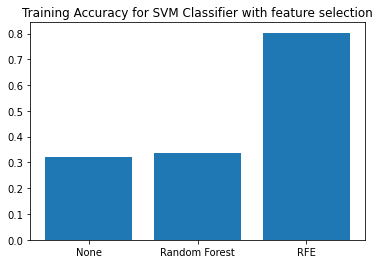

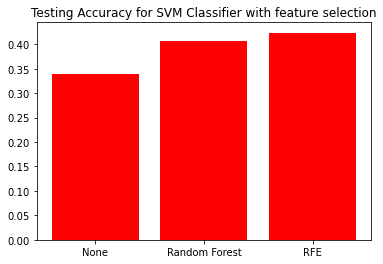

In [18]:
train_accuracy_list = [train_accuracy_svm_norm, train_accuracy_svm_rf, train_accuracy_svm_rfe ]
test_accuracy_list = [test_accuracy_svm_norm, test_accuracy_svm_rf, test_accuracy_svm_rfe ]
labels = ['None', 'Random Forest', 'RFE']

fig1,ax1 = plt.subplots()
ax1.set_title("Training Accuracy for SVM Classifier with feature selection")
ax1.bar(labels, train_accuracy_list)
plt.savefig("Train_Accuracy.png")

fig2,ax2 = plt.subplots()
ax2.set_title("Testing Accuracy for SVM Classifier with feature selection")
ax2.bar(labels, test_accuracy_list, color='r')
plt.savefig("Test_Accuracy.png")